<a href="https://colab.research.google.com/github/Surajpatra700/YoloV8_CV/blob/main/yolov8_Instance_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi

Fri Nov 24 19:51:22 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [3]:
!pip install ultralytics

from IPython import display
display.clear_output()
!yolo mode=check

Traceback (most recent call last):
  File "/usr/local/bin/yolo", line 8, in <module>
    sys.exit(entrypoint())
  File "/usr/local/lib/python3.10/dist-packages/ultralytics/cfg/__init__.py", line 392, in entrypoint
    raise ValueError(f"Invalid 'mode={mode}'. Valid modes are {MODES}.\n{CLI_HELP_MSG}")
ValueError: Invalid 'mode=check'. Valid modes are ('train', 'val', 'predict', 'export', 'track', 'benchmark').

    Arguments received: ['yolo', 'mode=check']. Ultralytics 'yolo' commands use the following syntax:

        yolo TASK MODE ARGS

        Where   TASK (optional) is one of ('detect', 'segment', 'classify', 'pose')
                MODE (required) is one of ('train', 'val', 'predict', 'export', 'track', 'benchmark')
                ARGS (optional) are any number of custom 'arg=value' pairs like 'imgsz=320' that override defaults.
                    See all ARGS at https://docs.ultralytics.com/usage/cfg or with 'yolo cfg'

    1. Train a detection model for 10 epochs with an ini

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

In [5]:
%cd {HOME}

!yolo task=segment mode=predict model=yolov8n-seg.pt conf=0.25 source="https://media.roboflow.com/notebooks/examples/dog.jpeg"

/content
100% 6.73M/6.73M [00:00<00:00, 117MB/s]
Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3404320 parameters, 0 gradients, 12.6 GFLOPs

100% 104k/104k [00:00<00:00, 109MB/s]
image 1/1 /content/dog.jpeg: 640x384 1 person, 1 dog, 101.0ms
Speed: 11.3ms preprocess, 101.0ms inference, 21.7ms postprocess per image at shape (1, 3, 640, 384)
Results saved to runs/segment/predict
💡 Learn more at https://docs.ultralytics.com/modes/predict


/content


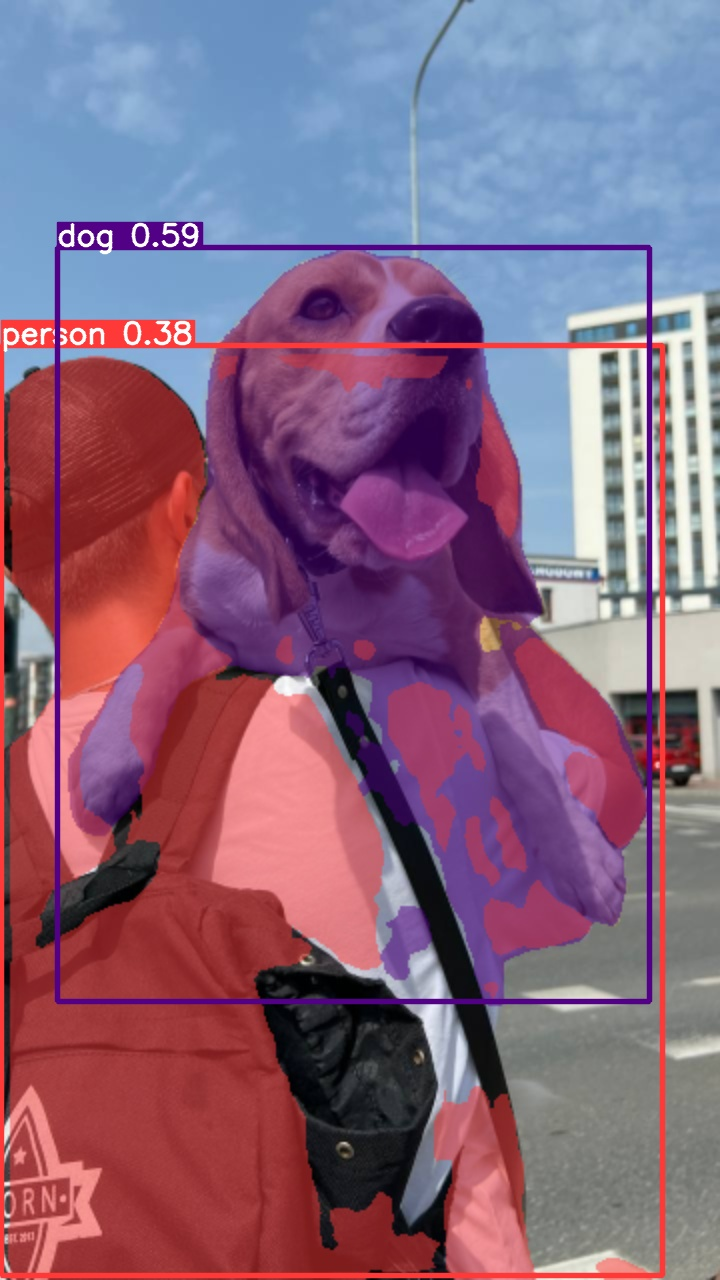

In [6]:
%cd {HOME}
Image(filename= 'runs/segment/predict/dog.jpeg', height=500)

In [7]:
%cd {HOME}
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="OnBDYqnuKZJert3rJslX")
project = rf.workspace("deep-learning-uhyyo").project("underwater-instance-segmentation")
dataset = project.version(1).download("yolov8")

/content
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 18.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.5 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna
    Foun

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.217, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Underwater-Instance-Segmentation-1 in yolov8:: 100%|██████████| 9132/9132 [00:03<00:00, 2782.06it/s]


In [9]:
!yolo task=segment mode=train model=yolov8n-seg.pt data=/content/Underwater-Instance-Segmentation-1/data.yaml epochs=15

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/content/Underwater-Instance-Segmentation-1/data.yaml, epochs=15, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train2, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, stream_buffer=False, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, form

In [10]:
!dir {HOME}/runs/segment/train2

args.yaml					    MaskF1_curve.png	train_batch861.jpg
BoxF1_curve.png					    MaskP_curve.png	train_batch862.jpg
BoxP_curve.png					    MaskPR_curve.png	val_batch0_labels.jpg
BoxPR_curve.png					    MaskR_curve.png	val_batch0_pred.jpg
BoxR_curve.png					    results.csv		val_batch1_labels.jpg
confusion_matrix_normalized.png			    results.png		val_batch1_pred.jpg
confusion_matrix.png				    train_batch0.jpg	val_batch2_labels.jpg
events.out.tfevents.1700855787.bd24114d5408.2388.0  train_batch1.jpg	val_batch2_pred.jpg
labels_correlogram.jpg				    train_batch2.jpg	weights
labels.jpg					    train_batch860.jpg


/content


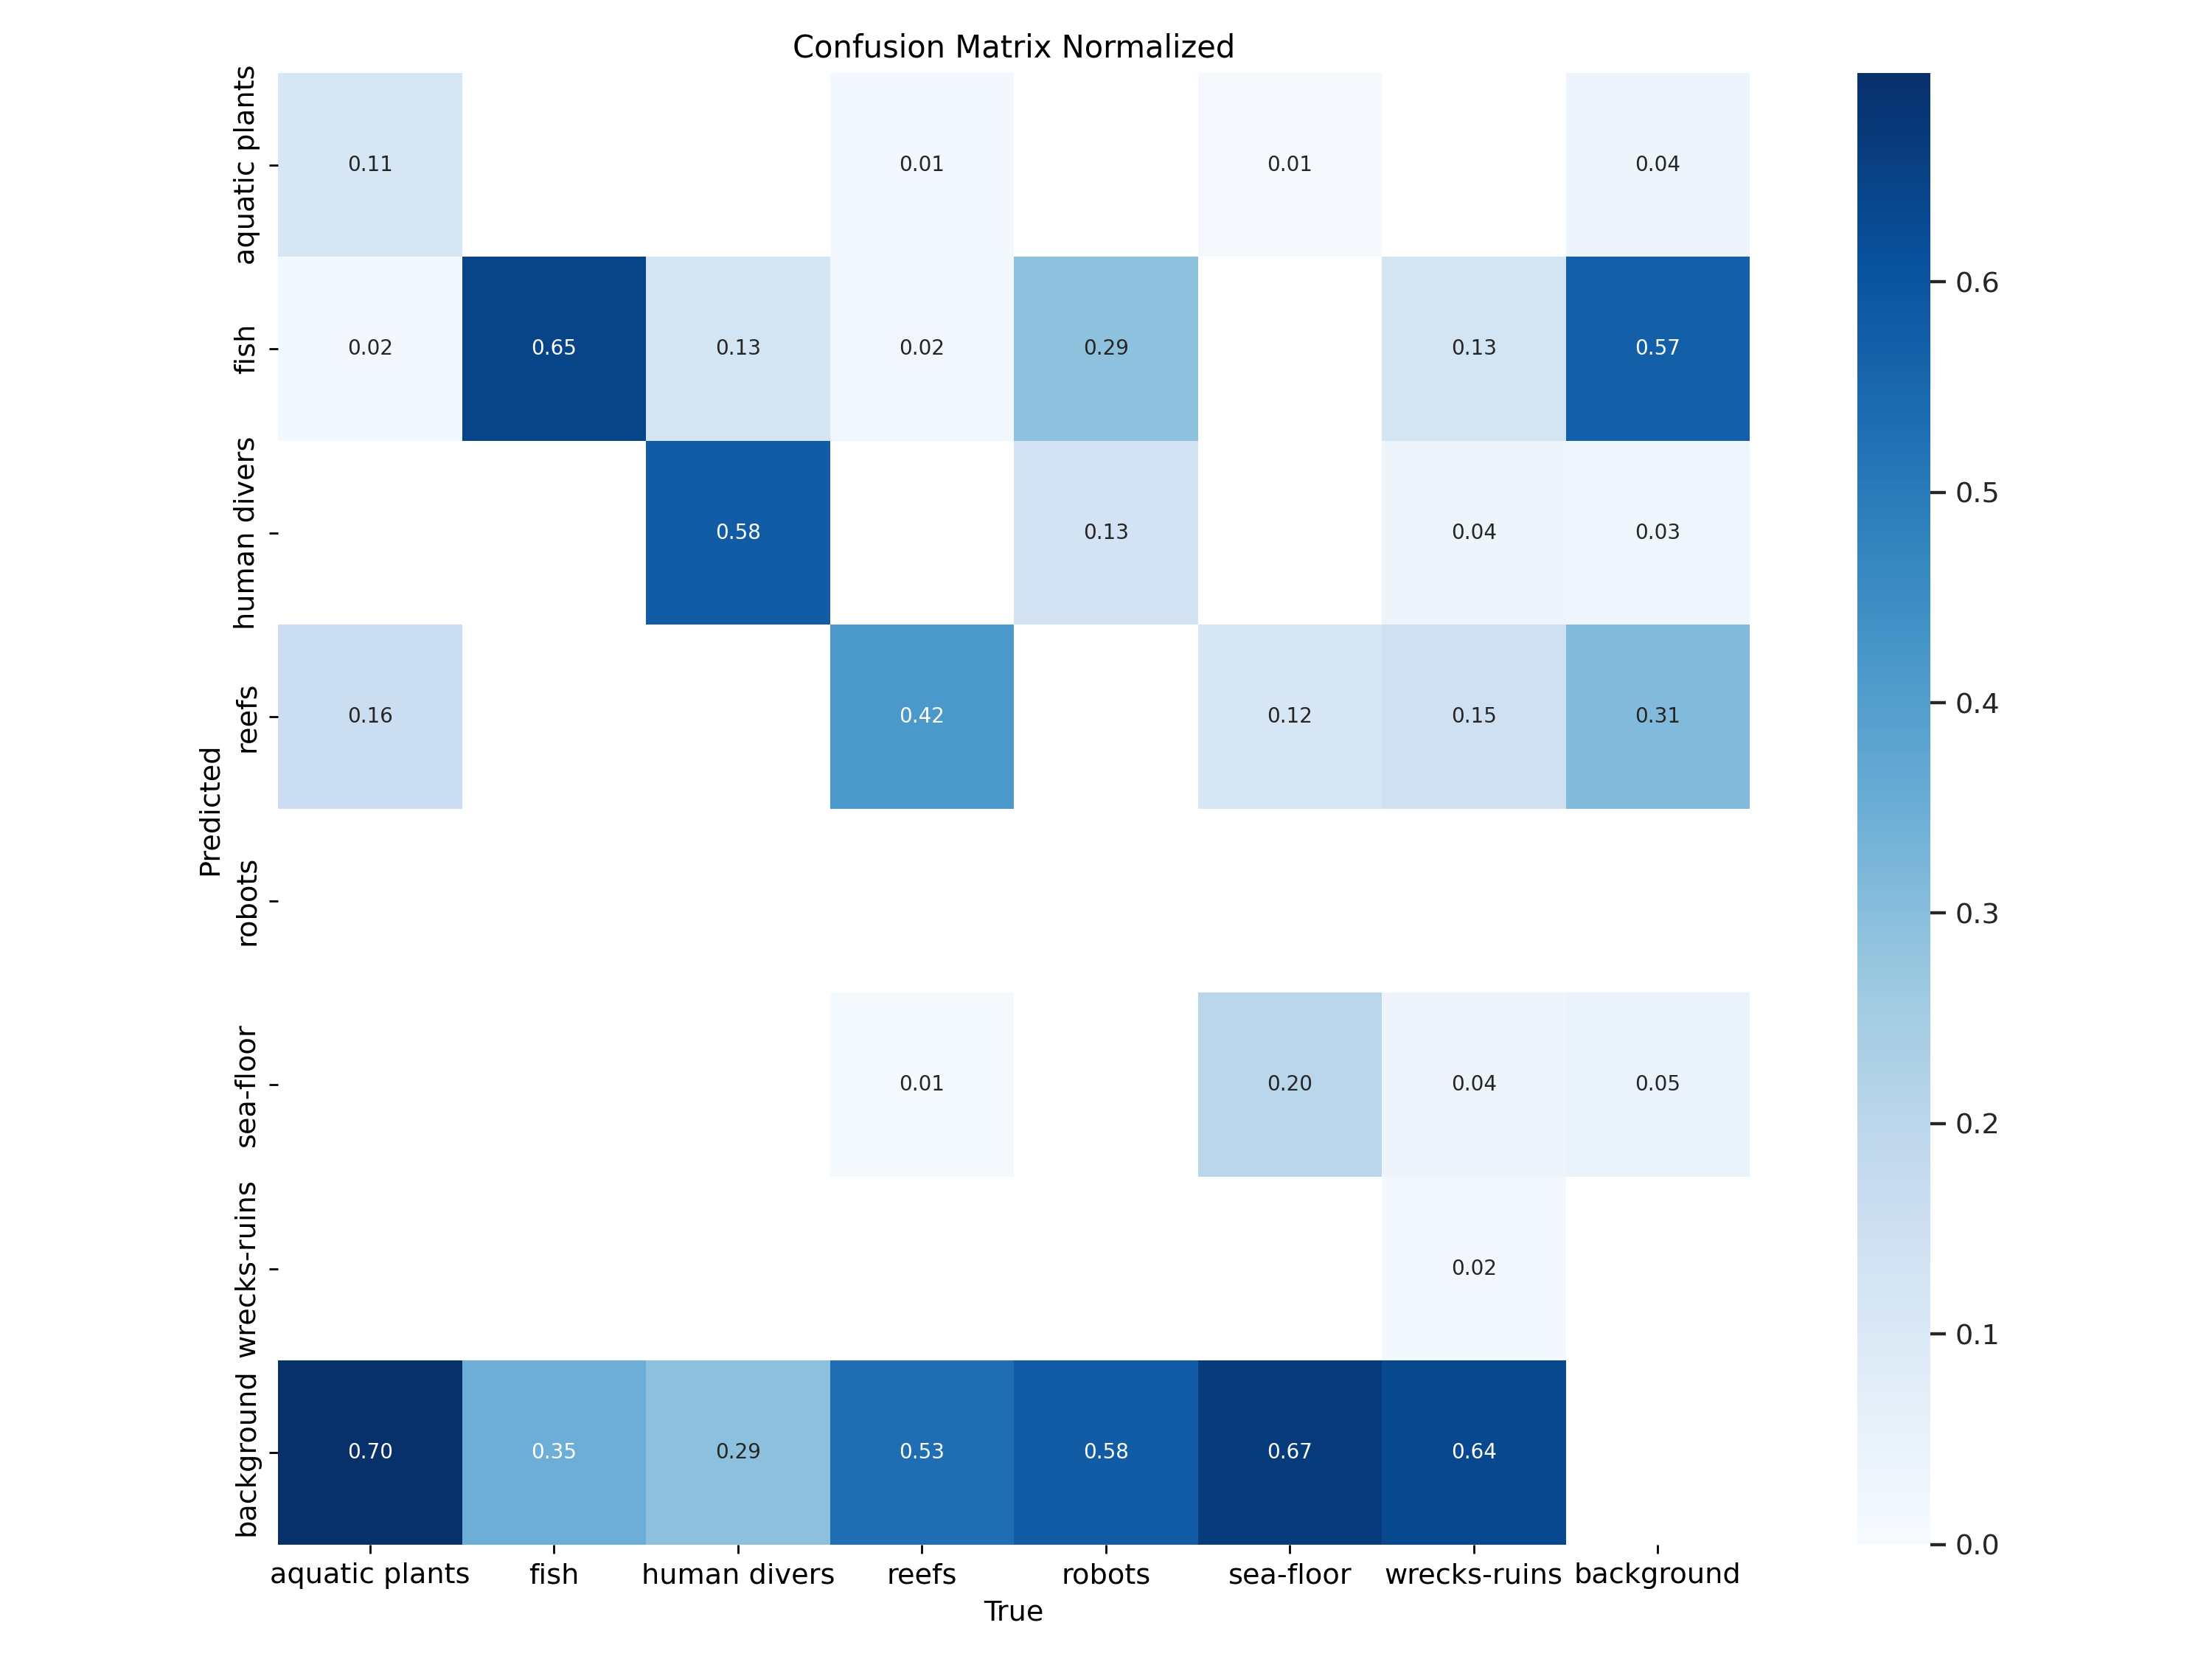

In [13]:
%cd {HOME}
Image(filename='runs/segment/train2/confusion_matrix_normalized.png', height=500)

/content


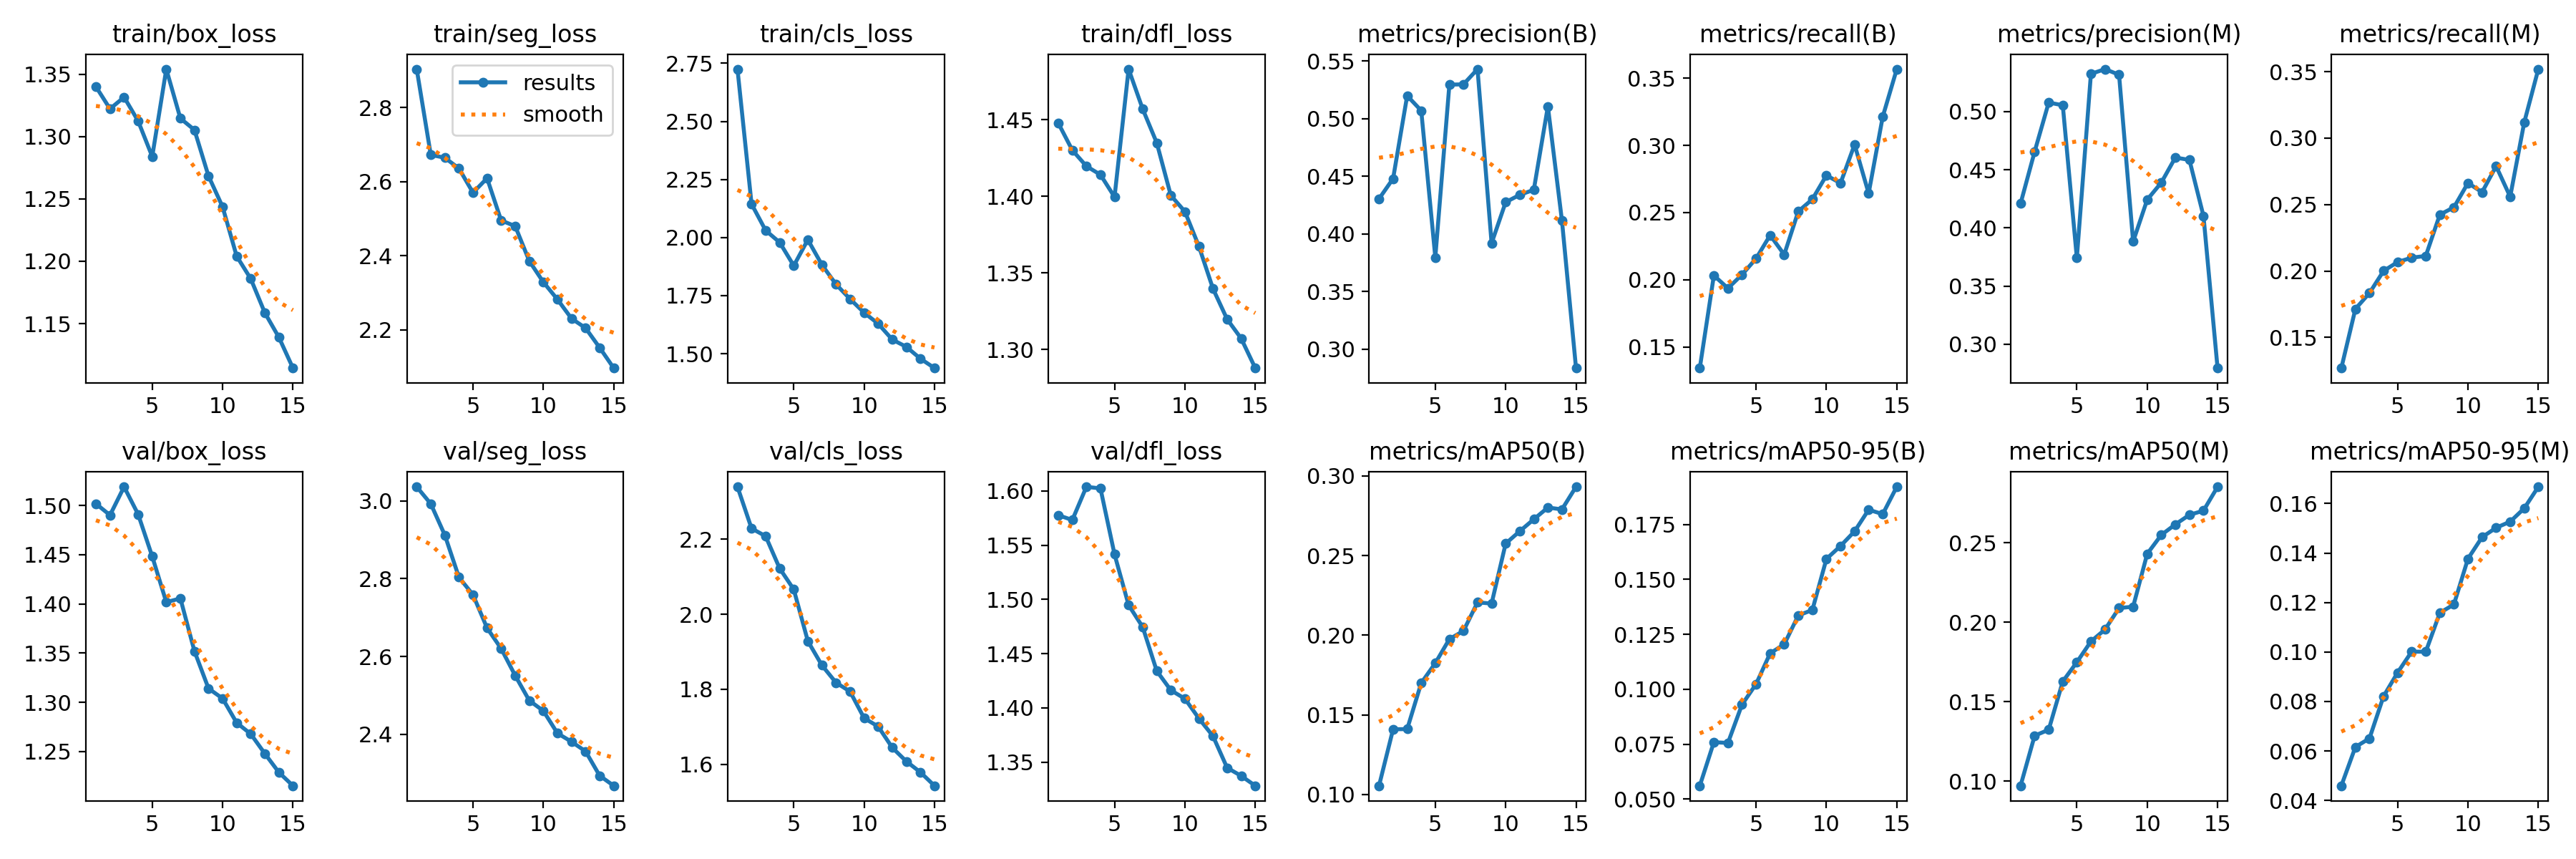

In [15]:
%cd {HOME}
Image(filename='runs/segment/train2/results.png', height=500)

In [16]:
%cd {HOME}

!yolo task=segment mode=val model={HOME}/runs/segment/train2/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259429 parameters, 0 gradients, 12.0 GFLOPs
val: Scanning /content/Underwater-Instance-Segmentation-1/valid/labels.cache... 912 images, 0 backgrounds, 0 corrupt: 100% 912/912 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95)     Mask(P          R      mAP50  mAP50-95): 100% 57/57 [00:26<00:00,  2.16it/s]
                   all        912       5404      0.283      0.357      0.293      0.192      0.279      0.352      0.285      0.166
        aquatic plants        912        266      0.277      0.248      0.166     0.0923       0.26      0.233       0.15     0.0703
                  fish        912       3090      0.516      0.694       0.63      0.415      0.517      0.695      0.632      0.387
          human divers        912        150      0.471      0.687      0.617      0.432      0.462 

In [18]:
import glob
from IPython.display import Image, display

!yolo task=segment mode=predict model={HOME}/runs/segment/train2/weights/best.pt conf=0.25 source=/content/drive/MyDrive/datasets/fish.mp4

Ultralytics YOLOv8.0.217 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
YOLOv8n-seg summary (fused): 195 layers, 3259429 parameters, 0 gradients, 12.0 GFLOPs

video 1/1 (1/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 7 fishs, 114.5ms
video 1/1 (2/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 7 fishs, 9.4ms
video 1/1 (3/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 8 fishs, 8.5ms
video 1/1 (4/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 8 fishs, 8.6ms
video 1/1 (5/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 7 fishs, 9.5ms
video 1/1 (6/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 6 fishs, 8.5ms
video 1/1 (7/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 6 fishs, 8.5ms
video 1/1 (8/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 6 fishs, 8.5ms
video 1/1 (9/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 9 fishs, 8.8ms
video 1/1 (10/197) /content/drive/MyDrive/datasets/fish.mp4: 384x640 9 fishs